This notebook uses [PyTorch](https://pytorch.org/), which is a library that can automatically differentiate functions and is commonly used to implement neural networks. Because of its capability to automatically differentiate functions, the formula for the gradient does not need to be manually derived -- this comes especially handy when working with neural networks, whose gradient formula can be quite complicated, especially for complex architectures. 

We recommend going over the [PyTorch tutorial](https://pytorch.org/tutorials/beginner/basics/intro.html) and then the starter code below. For any new functions that you come across, you can look up the documentation [here](https://pytorch.org/docs/stable/index.html). 

We recommend running this notebook on Google Colab to avoid having to install PyTorch and to take advantage of GPUs, which make training faster.

## Load packages

In [1]:
# load packages
# make sure to install the pacakge "tqdm" for the progress bar when training.
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
from torchvision.utils import save_image
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
import imageio
import matplotlib.image as mpimg
from scipy import ndimage

path_prefix = ""

If running on Google Colab, you need to upload the file `autoencoder_starter.py`. To do so, you need to click on the folder icon on the left side of the page, which brings up a panel that would allow you to upload files. Note however uploading the file this way has a downside in that if your Python runtime times out or is otherwise restarted, the file will be erased and you will need to re-upload. 

If you would like to avoid this, you can create a directory named `CMPT_726Fall2021_A3` in your Google Drive and upload `autoencoder_starter.py` to that directory. Then execute the following block of code to mount your Google Drive. 

In [ ]:
# transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))])
# trainTransform  = torchvision.transforms.Compose([torchvision.transforms.ToTensor(), torchvision.transforms.Normalize((0.1307,), (0.3081,))])
# trainset = torchvision.datasets.FashionMNIST(root='{}/./data'.format(path_prefix),  train=True,download=True, transform=transform)

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')
# path_prefix = "/content/gdrive/MyDrive/CMPT_726Fall2021_A4"
path_prefix = "/content/gdrive/MyDrive/Colab Notebooks/CMPT_726Fall2021_A4"

import sys
sys.path.insert(1, path_prefix)

Mounted at /content/gdrive


## Define your architecture here.

The `Autoencoder` class has several important functions unimplemented. You are required to implement the two sub-classes of `Encoder` and `Decoder`, i.e, the architecture and forward function of the encoder and decoder.


Question 2 Part 1

In [3]:
class Autoencoder(nn.Module):

    def __init__(self,dim_latent_representation=2):

        super(Autoencoder,self).__init__()

        class Encoder(nn.Module):
            def __init__(self, output_size=2):
                super(Encoder, self).__init__()
                self.encoder = nn.Linear(28*28, output_size)

            def forward(self, x):
                x = x.flatten(1)
                encoded = self.encoder(x)
                return encoded

        class Decoder(nn.Module):
            def __init__(self, input_size=2):
                super(Decoder, self).__init__()
                self.decoder = nn.Sequential(
                  nn.Linear(input_size, 28*28),
                  nn.Sigmoid()
              )

            def forward(self, z):
                decoded = self.decoder(z)
                decoded = decoded.reshape(-1, 1, 28, 28)
                return decoded

        self.encoder = Encoder(output_size=dim_latent_representation)
        self.decoder = Decoder(input_size=dim_latent_representation)

    def forward(self,x):
        # This function should be modified for the DAE and VAE
        x = self.encoder(x)
        x = self.decoder(x)
        # for the VAE forward function should also return mu and logvar
        return x

## Training the Model

The training loop is provided by the `Autoencoder_Trainer` class from `autoencoder_starter.py`.

In [ ]:
# my code

from autoencoder_starter import Autoencoder_Trainer

# LEARNING_RATE = 1e-3
# EPOCH_NUMBER= 10 # the number of epochs and learning rate can be tuned.

# autoencoder = Autoencoder(dim_latent_representation=2)
# trainer = Autoencoder_Trainer(autoencoder_model=autoencoder,learning_rate=LEARNING_RATE,path_prefix=path_prefix)
# dataiter = iter(trainer.train_loader)
# images, labels = dataiter.next()
# print(torch.min(images), torch.max(images))
# print(trainer.trainset)
# input_shape = (1, 28, 28)


In [4]:
from autoencoder_starter import Autoencoder_Trainer

LEARNING_RATE = 1e-3
EPOCH_NUMBER= 15 # the number of epochs and learning rate can be tuned.

autoencoder = Autoencoder(dim_latent_representation=2)
trainer = Autoencoder_Trainer(autoencoder_model=autoencoder,learning_rate=LEARNING_RATE,path_prefix=path_prefix)


try:
    for epoch in range(1, EPOCH_NUMBER + 1):
        trainer.train(epoch)
        trainer.validate(epoch)
except (KeyboardInterrupt, SystemExit):
        print("Manual Interruption")

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting /content/gdrive/MyDrive/Colab Notebooks/CMPT_726Fall2021_A4/./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to /content/gdrive/MyDrive/Colab Notebooks/CMPT_726Fall2021_A4/./data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting /content/gdrive/MyDrive/Colab Notebooks/CMPT_726Fall2021_A4/./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to /content/gdrive/MyDrive/Colab Notebooks/CMPT_726Fall2021_A4/./data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting /content/gdrive/MyDrive/Colab Notebooks/CMPT_726Fall2021_A4/./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to /content/gdrive/MyDrive/Colab Notebooks/CMPT_726Fall2021_A4/./data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting /content/gdrive/MyDrive/Colab Notebooks/CMPT_726Fall2021_A4/./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to /content/gdrive/MyDrive/Colab Notebooks/CMPT_726Fall2021_A4/./data/FashionMNIST/raw



/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
100%|██████████| 1875/1875 [00:21<00:00, 85.87it/s]

====> Epoch: 1 Average loss: 0.9148



100%|██████████| 313/313 [00:03<00:00, 101.19it/s]

====> Val set loss (reconstruction error) : 0.8315



100%|██████████| 1875/1875 [00:22<00:00, 84.97it/s]

====> Epoch: 2 Average loss: 0.8113



100%|██████████| 313/313 [00:03<00:00, 101.81it/s]

====> Val set loss (reconstruction error) : 0.7924



100%|██████████| 1875/1875 [00:22<00:00, 85.04it/s]

====> Epoch: 3 Average loss: 0.7886



100%|██████████| 313/313 [00:03<00:00, 98.17it/s] 

====> Val set loss (reconstruction error) : 0.7782



100%|██████████| 1875/1875 [00:22<00:00, 84.94it/s]

====> Epoch: 4 Average loss: 0.7776



100%|██████████| 313/313 [00:03<00:00, 99.41it/s] 

====> Val set loss (reconstruction error) : 0.7708



100%|██████████| 1875/1875 [00:22<00:00, 84.85it/s]

====> Epoch: 5 Average loss: 0.7714



100%|██████████| 313/313 [00:03<00:00, 99.55it/s] 

====> Val set loss (reconstruction error) : 0.7661



100%|██████████| 1875/1875 [00:22<00:00, 84.94it/s]

====> Epoch: 6 Average loss: 0.7678



100%|██████████| 313/313 [00:03<00:00, 99.61it/s]

====> Val set loss (reconstruction error) : 0.7637



100%|██████████| 1875/1875 [00:22<00:00, 83.61it/s]

====> Epoch: 7 Average loss: 0.7660



100%|██████████| 313/313 [00:03<00:00, 100.30it/s]

====> Val set loss (reconstruction error) : 0.7625



100%|██████████| 1875/1875 [00:22<00:00, 84.52it/s]

====> Epoch: 8 Average loss: 0.7650



100%|██████████| 313/313 [00:03<00:00, 100.11it/s]

====> Val set loss (reconstruction error) : 0.7618



100%|██████████| 1875/1875 [00:22<00:00, 84.88it/s]

====> Epoch: 9 Average loss: 0.7645



100%|██████████| 313/313 [00:03<00:00, 100.02it/s]

====> Val set loss (reconstruction error) : 0.7614



100%|██████████| 1875/1875 [00:22<00:00, 84.14it/s]

====> Epoch: 10 Average loss: 0.7641



100%|██████████| 313/313 [00:03<00:00, 99.76it/s]

====> Val set loss (reconstruction error) : 0.7611



100%|██████████| 1875/1875 [00:22<00:00, 84.33it/s]

====> Epoch: 11 Average loss: 0.7636



100%|██████████| 313/313 [00:03<00:00, 100.43it/s]

====> Val set loss (reconstruction error) : 0.7601



100%|██████████| 1875/1875 [00:22<00:00, 83.79it/s]

====> Epoch: 12 Average loss: 0.7628



100%|██████████| 313/313 [00:03<00:00, 99.87it/s] 

====> Val set loss (reconstruction error) : 0.7599



100%|██████████| 1875/1875 [00:22<00:00, 84.37it/s]

====> Epoch: 13 Average loss: 0.7626



100%|██████████| 313/313 [00:03<00:00, 99.19it/s]

====> Val set loss (reconstruction error) : 0.7598



100%|██████████| 1875/1875 [00:22<00:00, 83.39it/s]

====> Epoch: 14 Average loss: 0.7624



100%|██████████| 313/313 [00:03<00:00, 98.98it/s]

====> Val set loss (reconstruction error) : 0.7597



100%|██████████| 1875/1875 [00:22<00:00, 84.15it/s]

====> Epoch: 15 Average loss: 0.7623



100%|██████████| 313/313 [00:03<00:00, 98.34it/s] 

====> Val set loss (reconstruction error) : 0.7596


If in the above cell, you find that the download of the dataset is unsuccessful because the server is down, you can also download the data from Canvas and put the data in the same directory of this notebook and `autoencoder_starter.py`. If you are running this notebook on Google Colab, you can create a directory called `CMPT_726Fall2021_A3` in your Google Drive and put the data directory you downloaded from Canvas inside. Then if you haven't mounted your Google Drive earlier using the block of code above, mount Google Drive by executing the following block of code.

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
path_prefix = "/content/gdrive/MyDrive/CMPT_726Fall2021_A3"

## Visualizing 2D Bottleneck Feature Representations

We can visualize the 2D bottleneck representations of data points and their ground truth class labels with a scatter plot.

The `scatter_plot` function takes the following arguments:
* latent_presentations - (N, dimension_latent_representation) numpy array
* labels - (N, ) numpy array: the labels of the ground truth classes

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


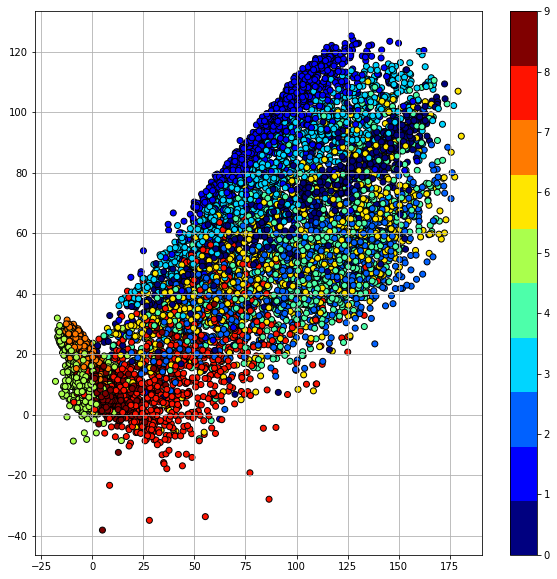

In [5]:
with torch.no_grad():
    model = trainer.model
    model.eval()
    z=[];label=[]
    for x,y in trainer.val_loader:
        x = x.to(trainer.device)
        x = x.view(x.size(0), -1)
        z_ = model.encoder(x.to(trainer.device))
        z += z_.cpu().tolist()
        label += y.cpu().tolist()
    z = np.asarray(z)
    label = np.asarray(label)

from autoencoder_starter import scatter_plot
scatter_plot(latent_representations=z,labels=label)

## Generating Images by Sampling Bottleneck Features

So here we can generate new images by sampling bottleneck features, and use the decoder to generate images. 

The code below provides an example of how to generate images by sampling bottleneck features. 

The `display_images_in_a_row` takes the following arguments:
* images: (N,28,28): N images of 28*28 as a numpy array
* file_path: file path name for where to store the figure
* display: display the image or not


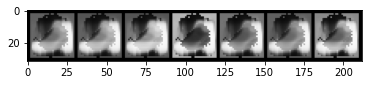

In [6]:
with torch.no_grad():
    samples = torch.randn(7, 2).to(trainer.device)
    samples = trainer.model.decoder(samples).cpu()

images = samples

from autoencoder_starter import display_images_in_a_row
display_images_in_a_row(images)

## Reconstructing Images

We can first retrieve the validation set and then pick 64 images (the first 64 images, though you can do it randomly).

We use the autoencoder to reconstruct the images and visualize them below.

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Original images


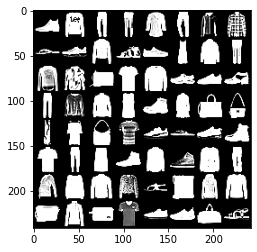

In [7]:
images = trainer.get_val_set() # get the entire validation set
total_number = 64
images = images[:total_number]

from autoencoder_starter import display_images_in_a_row
print("Original images")
display_images_in_a_row(images.cpu())

Reconstructed images


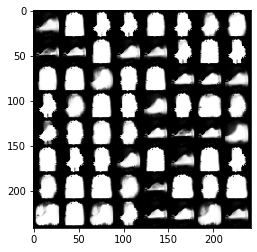

In [8]:
with torch.no_grad():
    images = images.to(trainer.device)
    reconstructed = trainer.model(images).cpu()
print("Reconstructed images")
display_images_in_a_row(reconstructed)

Question 2 Part 2

In [9]:
class Autoencoder(nn.Module):

    def __init__(self,dim_latent_representation=2):

        super(Autoencoder,self).__init__()

        class Encoder(nn.Module):
            def __init__(self, output_size=2):
                super(Encoder, self).__init__()
                # needs your implementation
                self.encoder = nn.Sequential(
                  nn.Linear(28*28, 1024), 
                  nn.ReLU(),
                  nn.Linear(1024, output_size)
              )

            def forward(self, x):
                # needs your implementation
                x = x.flatten(1)
                encoded = self.encoder(x)
                return encoded

        class Decoder(nn.Module):
            def __init__(self, input_size=2):
                super(Decoder, self).__init__()
                # needs your implementation
                self.decoder = nn.Sequential(
                  nn.Linear(input_size, 1024),
                  nn.ReLU(),
                  nn.Linear(1024, 28*28),
                  nn.Sigmoid()
              )

            def forward(self, z):
                # needs your implementation
                decoded = self.decoder(z)
                decoded = decoded.reshape(-1, 1, 28, 28)
                return decoded

        self.encoder = Encoder(output_size=dim_latent_representation)
        self.decoder = Decoder(input_size=dim_latent_representation)

    def forward(self,x):
        # This function should be modified for the DAE and VAE
        x = self.encoder(x)
        x = self.decoder(x)
        # for the VAE forward function should also return mu and logvar
        return x

In [10]:
from autoencoder_starter import Autoencoder_Trainer

LEARNING_RATE = 1e-3
EPOCH_NUMBER= 15 # the number of epochs and learning rate can be tuned.

autoencoder = Autoencoder(dim_latent_representation=2)
trainer = Autoencoder_Trainer(autoencoder_model=autoencoder,learning_rate=LEARNING_RATE,path_prefix=path_prefix)


try:
    for epoch in range(1, EPOCH_NUMBER + 1):
        trainer.train(epoch)
        trainer.validate(epoch)
except (KeyboardInterrupt, SystemExit):
        print("Manual Interruption")

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
100%|██████████| 1875/1875 [00:24<00:00, 75.16it/s]

====> Epoch: 1 Average loss: 0.6882



100%|██████████| 313/313 [00:03<00:00, 97.99it/s]

====> Val set loss (reconstruction error) : 0.6683



100%|██████████| 1875/1875 [00:25<00:00, 74.03it/s]

====> Epoch: 2 Average loss: 0.6672



100%|██████████| 313/313 [00:03<00:00, 98.09it/s]

====> Val set loss (reconstruction error) : 0.6638



100%|██████████| 1875/1875 [00:25<00:00, 73.46it/s]

====> Epoch: 3 Average loss: 0.6637



100%|██████████| 313/313 [00:03<00:00, 95.87it/s]

====> Val set loss (reconstruction error) : 0.6617



100%|██████████| 1875/1875 [00:25<00:00, 73.35it/s]

====> Epoch: 4 Average loss: 0.6619



100%|██████████| 313/313 [00:03<00:00, 97.77it/s]

====> Val set loss (reconstruction error) : 0.6597



100%|██████████| 1875/1875 [00:25<00:00, 73.23it/s]

====> Epoch: 5 Average loss: 0.6603



100%|██████████| 313/313 [00:03<00:00, 98.32it/s] 

====> Val set loss (reconstruction error) : 0.6583



100%|██████████| 1875/1875 [00:25<00:00, 72.66it/s]

====> Epoch: 6 Average loss: 0.6591



100%|██████████| 313/313 [00:03<00:00, 95.38it/s]

====> Val set loss (reconstruction error) : 0.6578



100%|██████████| 1875/1875 [00:25<00:00, 72.88it/s]

====> Epoch: 7 Average loss: 0.6585



100%|██████████| 313/313 [00:03<00:00, 94.89it/s]

====> Val set loss (reconstruction error) : 0.6573



100%|██████████| 1875/1875 [00:25<00:00, 73.47it/s]

====> Epoch: 8 Average loss: 0.6576



100%|██████████| 313/313 [00:03<00:00, 96.21it/s]

====> Val set loss (reconstruction error) : 0.6569



100%|██████████| 1875/1875 [00:25<00:00, 72.93it/s]

====> Epoch: 9 Average loss: 0.6568



100%|██████████| 313/313 [00:03<00:00, 95.65it/s]

====> Val set loss (reconstruction error) : 0.6561



100%|██████████| 1875/1875 [00:25<00:00, 73.02it/s]

====> Epoch: 10 Average loss: 0.6564



100%|██████████| 313/313 [00:03<00:00, 96.68it/s] 

====> Val set loss (reconstruction error) : 0.6563



100%|██████████| 1875/1875 [00:25<00:00, 73.06it/s]

====> Epoch: 11 Average loss: 0.6560



100%|██████████| 313/313 [00:03<00:00, 98.90it/s] 

====> Val set loss (reconstruction error) : 0.6554



100%|██████████| 1875/1875 [00:25<00:00, 72.66it/s]

====> Epoch: 12 Average loss: 0.6556



100%|██████████| 313/313 [00:03<00:00, 96.06it/s]

====> Val set loss (reconstruction error) : 0.6557



100%|██████████| 1875/1875 [00:26<00:00, 72.00it/s]

====> Epoch: 13 Average loss: 0.6553



100%|██████████| 313/313 [00:03<00:00, 94.82it/s] 

====> Val set loss (reconstruction error) : 0.6545



100%|██████████| 1875/1875 [00:25<00:00, 72.69it/s]

====> Epoch: 14 Average loss: 0.6552



100%|██████████| 313/313 [00:03<00:00, 95.62it/s] 

====> Val set loss (reconstruction error) : 0.6542



100%|██████████| 1875/1875 [00:25<00:00, 73.08it/s]

====> Epoch: 15 Average loss: 0.6548



100%|██████████| 313/313 [00:03<00:00, 96.24it/s] 

====> Val set loss (reconstruction error) : 0.6553


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


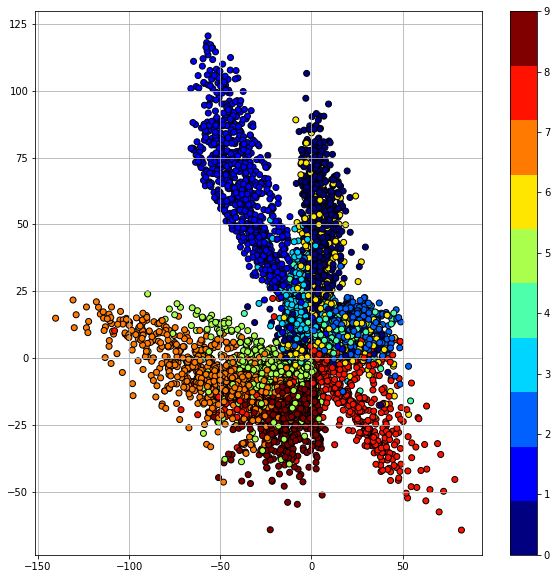

In [11]:
with torch.no_grad():
    model = trainer.model
    model.eval()
    z=[];label=[]
    for x,y in trainer.val_loader:
        x = x.to(trainer.device)
        x = x.view(x.size(0), -1)
        z_ = model.encoder(x.to(trainer.device))
        z += z_.cpu().tolist()
        label += y.cpu().tolist()
    z = np.asarray(z)
    label = np.asarray(label)

from autoencoder_starter import scatter_plot
scatter_plot(latent_representations=z,labels=label)

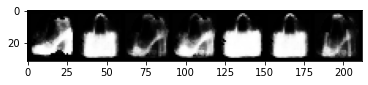

In [12]:
with torch.no_grad():
    samples = torch.randn(7, 2).to(trainer.device)
    samples = trainer.model.decoder(samples).cpu()

images = samples

from autoencoder_starter import display_images_in_a_row
display_images_in_a_row(images)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Original images


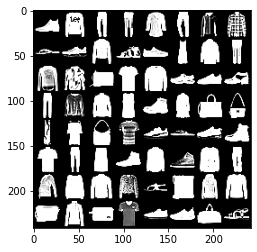

In [13]:
images = trainer.get_val_set() # get the entire validation set
total_number = 64
images = images[:total_number]

from autoencoder_starter import display_images_in_a_row
print("Original images")
display_images_in_a_row(images.cpu())

Reconstructed images


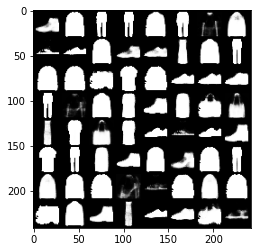

In [14]:
with torch.no_grad():
    images = images.to(trainer.device)
    reconstructed = trainer.model(images).cpu()
print("Reconstructed images")
display_images_in_a_row(reconstructed)

Question 2 Part 3

Network 1: autoencoder with bottleneck size of 30 dimensions and tanh activation function 

In [ ]:
class Autoencoder(nn.Module):

    def __init__(self,dim_latent_representation=2):

        super(Autoencoder,self).__init__()

        class Encoder(nn.Module):
            def __init__(self, output_size=2):
                super(Encoder, self).__init__()
                # needs your implementation
                self.encoder = nn.Sequential(nn.Linear(28*28, output_size))

            def forward(self, x):
                x = x.flatten(1)
                encoded = self.encoder(x)
                return encoded

        class Decoder(nn.Module):
            def __init__(self, input_size=2):
                super(Decoder, self).__init__()
                # needs your implementation
                self.decoder = nn.Sequential(
                  nn.Linear(input_size, 28*28),
                  nn.Tanh()
              )

            def forward(self, z):
                # needs your implementation
                decoded = self.decoder(z)
                decoded = decoded.reshape(-1, 1, 28, 28)
                return decoded

        self.encoder = Encoder(output_size=dim_latent_representation)
        self.decoder = Decoder(input_size=dim_latent_representation)

    def forward(self,x):
        # This function should be modified for the DAE and VAE
        x = self.encoder(x)
        x = self.decoder(x)
        # for the VAE forward function should also return mu and logvar
        return x

In [ ]:
from autoencoder_starter import Autoencoder_Trainer

LEARNING_RATE = 1e-2
EPOCH_NUMBER= 15 # the number of epochs and learning rate can be tuned.

autoencoder = Autoencoder(dim_latent_representation=30)
trainer = Autoencoder_Trainer(autoencoder_model=autoencoder,learning_rate=LEARNING_RATE,path_prefix=path_prefix)


try:
    for epoch in range(1, EPOCH_NUMBER + 1):
        trainer.train(epoch)
        trainer.validate(epoch)
except (KeyboardInterrupt, SystemExit):
        print("Manual Interruption")

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
100%|██████████| 1875/1875 [00:17<00:00, 107.22it/s]

====> Epoch: 1 Average loss: 0.5624



100%|██████████| 313/313 [00:02<00:00, 129.17it/s]

====> Val set loss (reconstruction error) : 0.5328



100%|██████████| 1875/1875 [00:17<00:00, 108.35it/s]

====> Epoch: 2 Average loss: 0.5327



100%|██████████| 313/313 [00:02<00:00, 126.66it/s]

====> Val set loss (reconstruction error) : 0.5322



100%|██████████| 1875/1875 [00:17<00:00, 108.51it/s]

====> Epoch: 3 Average loss: 0.5345



100%|██████████| 313/313 [00:02<00:00, 125.62it/s]

====> Val set loss (reconstruction error) : 0.5380



100%|██████████| 1875/1875 [00:17<00:00, 108.36it/s]

====> Epoch: 4 Average loss: 0.5345



100%|██████████| 313/313 [00:02<00:00, 124.46it/s]

====> Val set loss (reconstruction error) : 0.5315



100%|██████████| 1875/1875 [00:17<00:00, 109.66it/s]

====> Epoch: 5 Average loss: 0.5346



100%|██████████| 313/313 [00:02<00:00, 127.71it/s]

====> Val set loss (reconstruction error) : 0.5320



100%|██████████| 1875/1875 [00:17<00:00, 109.00it/s]


====> Epoch: 6 Average loss: 0.5348


100%|██████████| 313/313 [00:02<00:00, 129.38it/s]

====> Val set loss (reconstruction error) : 0.5292



100%|██████████| 1875/1875 [00:17<00:00, 109.51it/s]

====> Epoch: 7 Average loss: 0.5347



100%|██████████| 313/313 [00:02<00:00, 125.28it/s]

====> Val set loss (reconstruction error) : 0.5337



100%|██████████| 1875/1875 [00:17<00:00, 109.55it/s]

====> Epoch: 8 Average loss: 0.5350



100%|██████████| 313/313 [00:02<00:00, 129.78it/s]

====> Val set loss (reconstruction error) : 0.5322



100%|██████████| 1875/1875 [00:17<00:00, 107.95it/s]

====> Epoch: 9 Average loss: 0.5348



100%|██████████| 313/313 [00:02<00:00, 127.85it/s]

====> Val set loss (reconstruction error) : 0.5355



100%|██████████| 1875/1875 [00:17<00:00, 108.26it/s]

====> Epoch: 10 Average loss: 0.5348



100%|██████████| 313/313 [00:02<00:00, 129.92it/s]

====> Val set loss (reconstruction error) : 0.5308



100%|██████████| 1875/1875 [00:17<00:00, 108.91it/s]

====> Epoch: 11 Average loss: 0.5347



100%|██████████| 313/313 [00:02<00:00, 129.93it/s]

====> Val set loss (reconstruction error) : 0.5319



100%|██████████| 1875/1875 [00:17<00:00, 108.20it/s]

====> Epoch: 12 Average loss: 0.5349



100%|██████████| 313/313 [00:02<00:00, 126.62it/s]

====> Val set loss (reconstruction error) : 0.5293



100%|██████████| 1875/1875 [00:17<00:00, 107.34it/s]

====> Epoch: 13 Average loss: 0.5349



100%|██████████| 313/313 [00:02<00:00, 128.61it/s]

====> Val set loss (reconstruction error) : 0.5339



100%|██████████| 1875/1875 [00:17<00:00, 109.09it/s]

====> Epoch: 14 Average loss: 0.5346



100%|██████████| 313/313 [00:02<00:00, 130.36it/s]

====> Val set loss (reconstruction error) : 0.5302



100%|██████████| 1875/1875 [00:16<00:00, 111.85it/s]

====> Epoch: 15 Average loss: 0.5348



100%|██████████| 313/313 [00:02<00:00, 133.74it/s]

====> Val set loss (reconstruction error) : 0.5343


<Figure size 432x288 with 0 Axes>

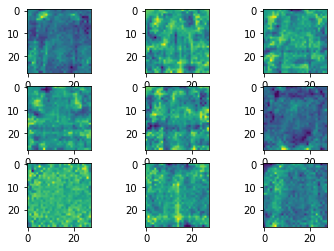

In [ ]:
# autoencoder.encoder.encoder[0].weight
# autoencoder.encoder.parameters()[0]
# plt.imshow(autoencoder.encoder.encoder[0].weight)
# def Plot_Kernel(_model):
#     kernel = _model.encoder.encoder[0].weight
#     kernel = kernel.cpu()
#     weights= kernel.detach().numpy()
#     plot_weights = [1,4,7,10,14,18,22,26,29]
#     for i in plot_weights:
#         img = weights[i].reshape(28,28)
#         plt.figure()
#         plt.imshow(img)

# Plot_Kernel(autoencoder)


# def Plot_Kernel(_model):
#     kernel = _model.encoder.encoder[0].weight
#     kernel = kernel.cpu()
#     weights= kernel.detach().numpy()
#     plot_weights = [1,4,7,10,14,18,22,26,29]
#     row = 0
#     column = 0
#     plt.figure()
#     # plt.imshow(img)
#     f, axarr = plt.subplots(3,3)
#     for i in plot_weights:
#         img = weights[i].reshape(28,28)
#         # print(row, column)
#         axarr[row, column].imshow(img)
#         if(column % 2 ==0 and column > 0):
#             column = 0
#             row += 1
#         else:
#             column += 1
from autoencoder_starter import Plot_Kernel
Plot_Kernel(autoencoder)

Network 2: autoencoder with bottleneck size of 30 dimensions and tanh activation function and adding isotropic gaussian noise to the inputs values.

In [ ]:
class DAE(nn.Module):

    def __init__(self,dim_latent_representation=2):

        super(DAE,self).__init__()

        class Encoder(nn.Module):
            def __init__(self, output_size=2):
                super(Encoder, self).__init__()
                # needs your implementation
                self.encoder = nn.Sequential(nn.Linear(28*28, output_size))

            def forward(self, x):
                x = x.flatten(1)
                encoded = self.encoder(x)
                return encoded

        class Decoder(nn.Module):
            def __init__(self, input_size=2):
                super(Decoder, self).__init__()
                # needs your implementation
                self.decoder = nn.Sequential(
                  nn.Linear(input_size, 28*28),
                  nn.Tanh()
              )

            def forward(self, z):
                # needs your implementation
                decoded = self.decoder(z)
                decoded = decoded.reshape(-1, 1, 28, 28)
                return decoded

        self.encoder = Encoder(output_size=dim_latent_representation)
        self.decoder = Decoder(input_size=dim_latent_representation)

    # Implement this function for the DAE model
    def add_noise(self, x, noise_type):
        device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        if noise_type=='Gaussian':
            return x + torch.normal(0.1, 0.5,x.size()).to(device)
        elif noise_type=='Dropout':
            m = nn.Dropout(p=0.2)
            return x + m(x)

    def forward(self,x):
        # This function should be modified for the DAE and VAE
        x = self.add_noise(x, 'Gaussian')
        x = self.encoder(x)
        x = self.decoder(x)
        # for the VAE forward function should also return mu and logvar
        return x

In [ ]:
from autoencoder_starter import Autoencoder_Trainer

LEARNING_RATE = 1e-2
EPOCH_NUMBER= 15 # the number of epochs and learning rate can be tuned.

dae = DAE(dim_latent_representation=30)
trainer = Autoencoder_Trainer(autoencoder_model=dae,learning_rate=LEARNING_RATE,path_prefix=path_prefix)


try:
    for epoch in range(1, EPOCH_NUMBER + 1):
        trainer.train(epoch)
        trainer.validate(epoch)
except (KeyboardInterrupt, SystemExit):
        print("Manual Interruption")

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
100%|██████████| 1875/1875 [00:17<00:00, 109.38it/s]

====> Epoch: 1 Average loss: 0.5839



100%|██████████| 313/313 [00:02<00:00, 125.78it/s]

====> Val set loss (reconstruction error) : 0.5437



100%|██████████| 1875/1875 [00:17<00:00, 107.84it/s]

====> Epoch: 2 Average loss: 0.5491



100%|██████████| 313/313 [00:02<00:00, 129.83it/s]

====> Val set loss (reconstruction error) : 0.5535



100%|██████████| 1875/1875 [00:17<00:00, 109.82it/s]

====> Epoch: 3 Average loss: 0.5509



100%|██████████| 313/313 [00:02<00:00, 126.16it/s]

====> Val set loss (reconstruction error) : 0.5487



100%|██████████| 1875/1875 [00:16<00:00, 110.40it/s]

====> Epoch: 4 Average loss: 0.5513



100%|██████████| 313/313 [00:02<00:00, 130.69it/s]

====> Val set loss (reconstruction error) : 0.5488



100%|██████████| 1875/1875 [00:17<00:00, 107.71it/s]

====> Epoch: 5 Average loss: 0.5509



100%|██████████| 313/313 [00:02<00:00, 128.06it/s]

====> Val set loss (reconstruction error) : 0.5460



100%|██████████| 1875/1875 [00:17<00:00, 108.93it/s]

====> Epoch: 6 Average loss: 0.5510



100%|██████████| 313/313 [00:02<00:00, 124.89it/s]

====> Val set loss (reconstruction error) : 0.5502



100%|██████████| 1875/1875 [00:17<00:00, 108.05it/s]

====> Epoch: 7 Average loss: 0.5511



100%|██████████| 313/313 [00:02<00:00, 128.73it/s]

====> Val set loss (reconstruction error) : 0.5507



100%|██████████| 1875/1875 [00:16<00:00, 110.46it/s]

====> Epoch: 8 Average loss: 0.5511



100%|██████████| 313/313 [00:02<00:00, 126.64it/s]

====> Val set loss (reconstruction error) : 0.5546



100%|██████████| 1875/1875 [00:17<00:00, 109.72it/s]

====> Epoch: 9 Average loss: 0.5508



100%|██████████| 313/313 [00:02<00:00, 128.47it/s]

====> Val set loss (reconstruction error) : 0.5528



100%|██████████| 1875/1875 [00:17<00:00, 107.44it/s]

====> Epoch: 10 Average loss: 0.5509



100%|██████████| 313/313 [00:02<00:00, 126.91it/s]

====> Val set loss (reconstruction error) : 0.5439



100%|██████████| 1875/1875 [00:17<00:00, 108.31it/s]

====> Epoch: 11 Average loss: 0.5512



100%|██████████| 313/313 [00:02<00:00, 123.86it/s]

====> Val set loss (reconstruction error) : 0.5490



100%|██████████| 1875/1875 [00:17<00:00, 109.81it/s]

====> Epoch: 12 Average loss: 0.5504



100%|██████████| 313/313 [00:02<00:00, 124.17it/s]

====> Val set loss (reconstruction error) : 0.5507



100%|██████████| 1875/1875 [00:17<00:00, 108.97it/s]

====> Epoch: 13 Average loss: 0.5513



100%|██████████| 313/313 [00:02<00:00, 127.91it/s]

====> Val set loss (reconstruction error) : 0.5469



100%|██████████| 1875/1875 [00:16<00:00, 110.55it/s]

====> Epoch: 14 Average loss: 0.5507



100%|██████████| 313/313 [00:02<00:00, 129.29it/s]

====> Val set loss (reconstruction error) : 0.5511



100%|██████████| 1875/1875 [00:17<00:00, 108.98it/s]

====> Epoch: 15 Average loss: 0.5509



100%|██████████| 313/313 [00:02<00:00, 126.20it/s]

====> Val set loss (reconstruction error) : 0.5499


<Figure size 432x288 with 0 Axes>

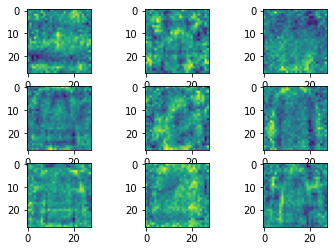

In [ ]:
from autoencoder_starter import Plot_Kernel
Plot_Kernel(dae)

Network 3: autoencoder with bottleneck size of 30 dimensions and tanh activation function and turning some of the inputs values to zero.

In [ ]:
class DAE(nn.Module):

    def __init__(self,dim_latent_representation=2):

        super(DAE,self).__init__()

        class Encoder(nn.Module):
            def __init__(self, output_size=2):
                super(Encoder, self).__init__()
                # needs your implementation
                self.encoder = nn.Sequential(nn.Linear(28*28, output_size))

            def forward(self, x):
                x = x.flatten(1)
                encoded = self.encoder(x)
                return encoded

        class Decoder(nn.Module):
            def __init__(self, input_size=2):
                super(Decoder, self).__init__()
                # needs your implementation
                self.decoder = nn.Sequential(
                  nn.Linear(input_size, 28*28),
                  nn.Tanh()
              )

            def forward(self, z):
                # needs your implementation
                decoded = self.decoder(z)
                decoded = decoded.reshape(-1, 1, 28, 28)
                return decoded

        self.encoder = Encoder(output_size=dim_latent_representation)
        self.decoder = Decoder(input_size=dim_latent_representation)

    # Implement this function for the DAE model
    def add_noise(self, x, noise_type):
        device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        if noise_type=='Gaussian':
            return x + torch.normal(0.1, 0.5,x.size()).to(device)
        elif noise_type=='Dropout':
            m = nn.Dropout(p=0.2)
            return x + m(x)

    def forward(self,x):
        # This function should be modified for the DAE and VAE
        x = self.add_noise(x, 'Dropout')
        x = self.encoder(x)
        x = self.decoder(x)
        # for the VAE forward function should also return mu and logvar
        return x

In [ ]:
from autoencoder_starter import Autoencoder_Trainer

LEARNING_RATE = 1e-2
EPOCH_NUMBER= 15 # the number of epochs and learning rate can be tuned.

dae = DAE(dim_latent_representation=30)
trainer = Autoencoder_Trainer(autoencoder_model=dae,learning_rate=LEARNING_RATE,path_prefix=path_prefix)


try:
    for epoch in range(1, EPOCH_NUMBER + 1):
        trainer.train(epoch)
        trainer.validate(epoch)
except (KeyboardInterrupt, SystemExit):
        print("Manual Interruption")

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
100%|██████████| 1875/1875 [00:17<00:00, 109.82it/s]

====> Epoch: 1 Average loss: 0.8316



100%|██████████| 313/313 [00:02<00:00, 129.10it/s]

====> Val set loss (reconstruction error) : 0.7890



100%|██████████| 1875/1875 [00:17<00:00, 108.53it/s]

====> Epoch: 2 Average loss: 0.7954



100%|██████████| 313/313 [00:02<00:00, 125.62it/s]

====> Val set loss (reconstruction error) : 0.7937



100%|██████████| 1875/1875 [00:17<00:00, 108.86it/s]

====> Epoch: 3 Average loss: 0.7938



100%|██████████| 313/313 [00:02<00:00, 127.80it/s]

====> Val set loss (reconstruction error) : 0.7944



100%|██████████| 1875/1875 [00:17<00:00, 108.95it/s]

====> Epoch: 4 Average loss: 0.7914



100%|██████████| 313/313 [00:02<00:00, 127.49it/s]

====> Val set loss (reconstruction error) : 0.7853



100%|██████████| 1875/1875 [00:16<00:00, 110.38it/s]

====> Epoch: 5 Average loss: 0.7899



100%|██████████| 313/313 [00:02<00:00, 126.85it/s]

====> Val set loss (reconstruction error) : 0.7826



100%|██████████| 1875/1875 [00:17<00:00, 108.13it/s]

====> Epoch: 6 Average loss: 0.7874



100%|██████████| 313/313 [00:02<00:00, 125.73it/s]

====> Val set loss (reconstruction error) : 0.7844



100%|██████████| 1875/1875 [00:17<00:00, 106.27it/s]

====> Epoch: 7 Average loss: 0.7866



100%|██████████| 313/313 [00:02<00:00, 127.69it/s]

====> Val set loss (reconstruction error) : 0.7839



100%|██████████| 1875/1875 [00:17<00:00, 109.46it/s]

====> Epoch: 8 Average loss: 0.7854



100%|██████████| 313/313 [00:02<00:00, 129.25it/s]

====> Val set loss (reconstruction error) : 0.7835



100%|██████████| 1875/1875 [00:17<00:00, 108.65it/s]

====> Epoch: 9 Average loss: 0.7836



100%|██████████| 313/313 [00:02<00:00, 133.66it/s]

====> Val set loss (reconstruction error) : 0.7870



100%|██████████| 1875/1875 [00:16<00:00, 111.29it/s]

====> Epoch: 10 Average loss: 0.7849



100%|██████████| 313/313 [00:02<00:00, 128.52it/s]

====> Val set loss (reconstruction error) : 0.7842



100%|██████████| 1875/1875 [00:16<00:00, 110.83it/s]

====> Epoch: 11 Average loss: 0.7847



100%|██████████| 313/313 [00:02<00:00, 130.32it/s]

====> Val set loss (reconstruction error) : 0.7856



100%|██████████| 1875/1875 [00:16<00:00, 111.64it/s]

====> Epoch: 12 Average loss: 0.7831



100%|██████████| 313/313 [00:02<00:00, 134.24it/s]

====> Val set loss (reconstruction error) : 0.7804



100%|██████████| 1875/1875 [00:16<00:00, 110.63it/s]

====> Epoch: 13 Average loss: 0.7821



100%|██████████| 313/313 [00:02<00:00, 130.50it/s]

====> Val set loss (reconstruction error) : 0.7838



100%|██████████| 1875/1875 [00:16<00:00, 110.34it/s]

====> Epoch: 14 Average loss: 0.7832



100%|██████████| 313/313 [00:02<00:00, 129.16it/s]

====> Val set loss (reconstruction error) : 0.7849



100%|██████████| 1875/1875 [00:17<00:00, 109.46it/s]

====> Epoch: 15 Average loss: 0.7821



100%|██████████| 313/313 [00:02<00:00, 134.22it/s]

====> Val set loss (reconstruction error) : 0.7807


<Figure size 432x288 with 0 Axes>

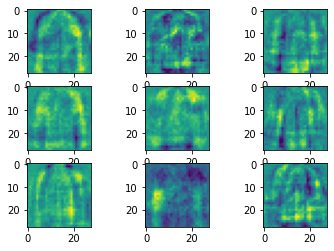

In [ ]:
from autoencoder_starter import Plot_Kernel
Plot_Kernel(dae)

Question 2 Part 4

Network 1: an autoencoder with bottleneck size of 30 dimensions and Tanh activation function




In [ ]:
class Autoencoder(nn.Module):

    def __init__(self,dim_latent_representation=2):

        super(Autoencoder,self).__init__()

        class Encoder(nn.Module):
            def __init__(self, output_size=2):
                super(Encoder, self).__init__()
                # needs your implementation
                self.encoder = nn.Sequential(
                    nn.Linear(28*28, output_size)
              )

            def forward(self, x):
                x = x.flatten(1)
                encoded = self.encoder(x)
                return encoded

        class Decoder(nn.Module):
            def __init__(self, input_size=2):
                super(Decoder, self).__init__()
                # needs your implementation
                self.decoder = nn.Sequential(
                  nn.Linear(input_size, 28*28),
                  nn.Tanh()
              )

            def forward(self, z):
                # needs your implementation
                decoded = self.decoder(z)
                decoded = decoded.reshape(-1, 1, 28, 28)
                return decoded

        self.encoder = Encoder(output_size=dim_latent_representation)
        self.decoder = Decoder(input_size=dim_latent_representation)

    def forward(self,x):
        # This function should be modified for the DAE and VAE
        x = self.encoder(x)
        x = self.decoder(x)
        # for the VAE forward function should also return mu and logvar
        return x

In [ ]:
from autoencoder_starter import Autoencoder_Trainer

LEARNING_RATE = 1e-2
EPOCH_NUMBER= 15 # the number of epochs and learning rate can be tuned.

autoencoder = Autoencoder(dim_latent_representation=30)
trainer = Autoencoder_Trainer(autoencoder_model=autoencoder,learning_rate=LEARNING_RATE,path_prefix=path_prefix)


try:
    for epoch in range(1, EPOCH_NUMBER + 1):
        trainer.train(epoch)
        trainer.validate(epoch)
except (KeyboardInterrupt, SystemExit):
        print("Manual Interruption")

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
100%|██████████| 1875/1875 [00:18<00:00, 102.44it/s]

====> Epoch: 1 Average loss: 0.5646



100%|██████████| 313/313 [00:02<00:00, 122.45it/s]

====> Val set loss (reconstruction error) : 0.5337



100%|██████████| 1875/1875 [00:18<00:00, 103.57it/s]

====> Epoch: 2 Average loss: 0.5325



100%|██████████| 313/313 [00:02<00:00, 120.39it/s]

====> Val set loss (reconstruction error) : 0.5302



100%|██████████| 1875/1875 [00:18<00:00, 100.90it/s]

====> Epoch: 3 Average loss: 0.5344



100%|██████████| 313/313 [00:02<00:00, 122.29it/s]

====> Val set loss (reconstruction error) : 0.5356



100%|██████████| 1875/1875 [00:18<00:00, 102.34it/s]

====> Epoch: 4 Average loss: 0.5349



100%|██████████| 313/313 [00:02<00:00, 122.99it/s]

====> Val set loss (reconstruction error) : 0.5371



100%|██████████| 1875/1875 [00:18<00:00, 104.09it/s]

====> Epoch: 5 Average loss: 0.5348



100%|██████████| 313/313 [00:02<00:00, 124.53it/s]

====> Val set loss (reconstruction error) : 0.5303



100%|██████████| 1875/1875 [00:17<00:00, 104.31it/s]

====> Epoch: 6 Average loss: 0.5348



100%|██████████| 313/313 [00:02<00:00, 123.30it/s]

====> Val set loss (reconstruction error) : 0.5325



100%|██████████| 1875/1875 [00:18<00:00, 104.09it/s]

====> Epoch: 7 Average loss: 0.5346



100%|██████████| 313/313 [00:02<00:00, 122.06it/s]

====> Val set loss (reconstruction error) : 0.5312



100%|██████████| 1875/1875 [00:18<00:00, 102.06it/s]

====> Epoch: 8 Average loss: 0.5348



100%|██████████| 313/313 [00:02<00:00, 120.60it/s]

====> Val set loss (reconstruction error) : 0.5323



100%|██████████| 1875/1875 [00:18<00:00, 102.10it/s]

====> Epoch: 9 Average loss: 0.5349



100%|██████████| 313/313 [00:02<00:00, 122.20it/s]

====> Val set loss (reconstruction error) : 0.5334



100%|██████████| 1875/1875 [00:18<00:00, 102.40it/s]


====> Epoch: 10 Average loss: 0.5346


100%|██████████| 313/313 [00:02<00:00, 121.52it/s]

====> Val set loss (reconstruction error) : 0.5299



100%|██████████| 1875/1875 [00:18<00:00, 101.29it/s]

====> Epoch: 11 Average loss: 0.5347



100%|██████████| 313/313 [00:02<00:00, 121.76it/s]

====> Val set loss (reconstruction error) : 0.5327



100%|██████████| 1875/1875 [00:18<00:00, 103.71it/s]

====> Epoch: 12 Average loss: 0.5350



100%|██████████| 313/313 [00:02<00:00, 123.22it/s]

====> Val set loss (reconstruction error) : 0.5308



100%|██████████| 1875/1875 [00:18<00:00, 102.14it/s]

====> Epoch: 13 Average loss: 0.5349



100%|██████████| 313/313 [00:02<00:00, 119.74it/s]

====> Val set loss (reconstruction error) : 0.5333



100%|██████████| 1875/1875 [00:18<00:00, 101.68it/s]

====> Epoch: 14 Average loss: 0.5348



100%|██████████| 313/313 [00:02<00:00, 121.36it/s]

====> Val set loss (reconstruction error) : 0.5309



100%|██████████| 1875/1875 [00:18<00:00, 103.26it/s]

====> Epoch: 15 Average loss: 0.5348



100%|██████████| 313/313 [00:02<00:00, 122.14it/s]

====> Val set loss (reconstruction error) : 0.5324


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.001s...
[t-SNE] Computed neighbors for 10000 samples in 2.512s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 3.142410
[t-SNE] KL divergence after 250 iterations with early exaggeration: 77.319229
[t-SNE] KL divergence after 300 iterations: 2.577145


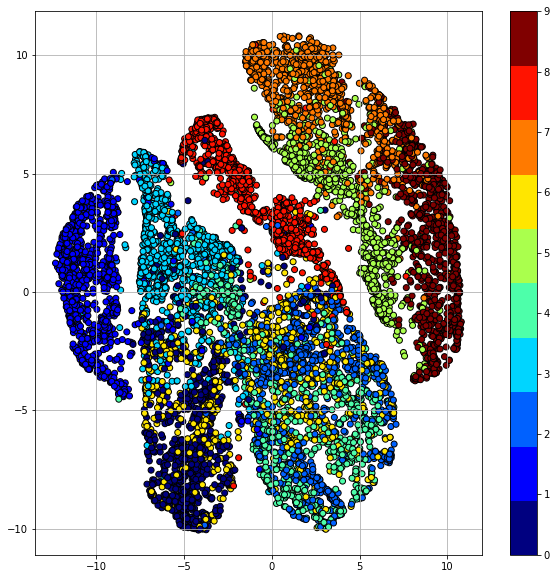

In [ ]:
with torch.no_grad():
    model = trainer.model
    model.eval()
    z=[];label=[]
    for x,y in trainer.val_loader:
        x = x.to(trainer.device)
        x = x.view(x.size(0), -1)
        z_ = model.encoder(x.to(trainer.device))
        z += z_.cpu().tolist()
        label += y.cpu().tolist()
    z = np.asarray(z)
    label = np.asarray(label)
    from sklearn.manifold import TSNE
    tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300, learning_rate='auto')
    transformed_z = tsne.fit_transform(z)


from autoencoder_starter import scatter_plot
scatter_plot(latent_representations=transformed_z,labels=label)

Network 2: Variational Autoencoder by adding DKL term




In [ ]:
class VAE(nn.Module):

    def __init__(self,dim_latent_representation=2):

        super(VAE,self).__init__()

        class Encoder(nn.Module):
            def __init__(self, output_size=2):
                super(Encoder, self).__init__()
                # needs your implementation
                self.encoder = nn.Sequential(
                    nn.Linear(28*28, output_size)
                )
                self.x1 = nn.Linear(output_size, output_size)
                self.x2 = nn.Linear(output_size, output_size)

            def forward(self, x):
                x = x.flatten(1)
                encoded = self.encoder(x)
                mu = self.x1(encoded)
                logvar = self.x2(encoded)
                return mu, logvar

        class Decoder(nn.Module):
            def __init__(self, input_size=2):
                super(Decoder, self).__init__()
                # needs your implementation
                self.decoder = nn.Sequential(
                  nn.Linear(input_size, 28*28),
                  nn.Tanh()
              )

            def forward(self, z):
                # needs your implementation
                decoded = self.decoder(z)
                decoded = decoded.reshape(-1, 1, 28, 28)
                return decoded

        self.encoder = Encoder(output_size=dim_latent_representation)
        self.decoder = Decoder(input_size=dim_latent_representation)

    # Implement this function for the VAE model
    def reparameterise(self, mu, logvar):
        if self.training:
              # var = logvar.exp()
              # std = var.sqrt()
              # eps = Variable(torch.cuda.FloatTensor(std.size()).normal_())
              # return eps.mul(std).add(mu)
              std = torch.exp(logvar/2)
              eps = torch.randn_like(std)
              return mu + std * eps
        else:
            return mu

    def forward(self,x):
        # This function should be modified for the DAE and VAE
        mu, logvar = self.encoder(x)
        reparameterised_data = self.reparameterise(mu, logvar)
        x = self.decoder(reparameterised_data)
        # for the VAE forward function should also return mu and logvar
        return x, mu, logvar

In [ ]:
from VAE_starter import VAE_Trainer

LEARNING_RATE = 1e-3
EPOCH_NUMBER= 15 # the number of epochs and learning rate can be tuned.

vae = VAE(dim_latent_representation=30)
trainer = VAE_Trainer(autoencoder_model=vae,learning_rate=LEARNING_RATE,path_prefix=path_prefix)


try:
    for epoch in range(1, EPOCH_NUMBER + 1):
        trainer.train(epoch)
        trainer.validate(epoch)
except (KeyboardInterrupt, SystemExit):
        print("Manual Interruption")

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
100%|██████████| 1875/1875 [00:16<00:00, 112.39it/s]

====> Epoch: 1 Average loss: 2.5389



100%|██████████| 313/313 [00:02<00:00, 139.20it/s]

====> Val set loss (reconstruction error) : 1.0171



100%|██████████| 1875/1875 [00:16<00:00, 112.91it/s]

====> Epoch: 2 Average loss: 0.9843



100%|██████████| 313/313 [00:02<00:00, 137.72it/s]

====> Val set loss (reconstruction error) : 0.9635



100%|██████████| 1875/1875 [00:16<00:00, 114.50it/s]

====> Epoch: 3 Average loss: 0.9597



100%|██████████| 313/313 [00:02<00:00, 138.53it/s]

====> Val set loss (reconstruction error) : 0.9513



100%|██████████| 1875/1875 [00:16<00:00, 111.03it/s]

====> Epoch: 4 Average loss: 0.9533



100%|██████████| 313/313 [00:02<00:00, 136.69it/s]

====> Val set loss (reconstruction error) : 0.9483



100%|██████████| 1875/1875 [00:16<00:00, 111.49it/s]

====> Epoch: 5 Average loss: 0.9517



100%|██████████| 313/313 [00:02<00:00, 134.14it/s]

====> Val set loss (reconstruction error) : 0.9475



100%|██████████| 1875/1875 [00:16<00:00, 110.70it/s]

====> Epoch: 6 Average loss: 0.9513



100%|██████████| 313/313 [00:02<00:00, 137.36it/s]

====> Val set loss (reconstruction error) : 0.9474



100%|██████████| 1875/1875 [00:16<00:00, 110.36it/s]

====> Epoch: 7 Average loss: 0.9513



100%|██████████| 313/313 [00:02<00:00, 137.33it/s]

====> Val set loss (reconstruction error) : 0.9474



100%|██████████| 1875/1875 [00:16<00:00, 111.39it/s]

====> Epoch: 8 Average loss: 0.9876



100%|██████████| 313/313 [00:02<00:00, 136.32it/s]

====> Val set loss (reconstruction error) : 0.9480



100%|██████████| 1875/1875 [00:16<00:00, 111.58it/s]


====> Epoch: 9 Average loss: 0.9515


100%|██████████| 313/313 [00:02<00:00, 135.38it/s]

====> Val set loss (reconstruction error) : 0.9474



100%|██████████| 1875/1875 [00:16<00:00, 111.11it/s]

====> Epoch: 10 Average loss: 0.9513



100%|██████████| 313/313 [00:02<00:00, 131.88it/s]

====> Val set loss (reconstruction error) : 0.9474



100%|██████████| 1875/1875 [00:17<00:00, 109.96it/s]

====> Epoch: 11 Average loss: 0.9513



100%|██████████| 313/313 [00:02<00:00, 135.69it/s]

====> Val set loss (reconstruction error) : 0.9474



100%|██████████| 1875/1875 [00:17<00:00, 109.54it/s]

====> Epoch: 12 Average loss: 0.9514



100%|██████████| 313/313 [00:02<00:00, 137.67it/s]

====> Val set loss (reconstruction error) : 0.9474



100%|██████████| 1875/1875 [00:17<00:00, 110.10it/s]

====> Epoch: 13 Average loss: 0.9513



100%|██████████| 313/313 [00:02<00:00, 135.30it/s]

====> Val set loss (reconstruction error) : 0.9474



100%|██████████| 1875/1875 [00:17<00:00, 109.19it/s]

====> Epoch: 14 Average loss: 0.9513



100%|██████████| 313/313 [00:02<00:00, 132.70it/s]

====> Val set loss (reconstruction error) : 0.9474



100%|██████████| 1875/1875 [00:16<00:00, 110.49it/s]

====> Epoch: 15 Average loss: 0.9513



100%|██████████| 313/313 [00:02<00:00, 137.41it/s]

====> Val set loss (reconstruction error) : 0.9474


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.001s...
[t-SNE] Computed neighbors for 10000 samples in 3.093s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 0.000102
[t-SNE] KL divergence after 250 iterations with early exaggeration: 74.479195
[t-SNE] KL divergence after 300 iterations: 2.469247


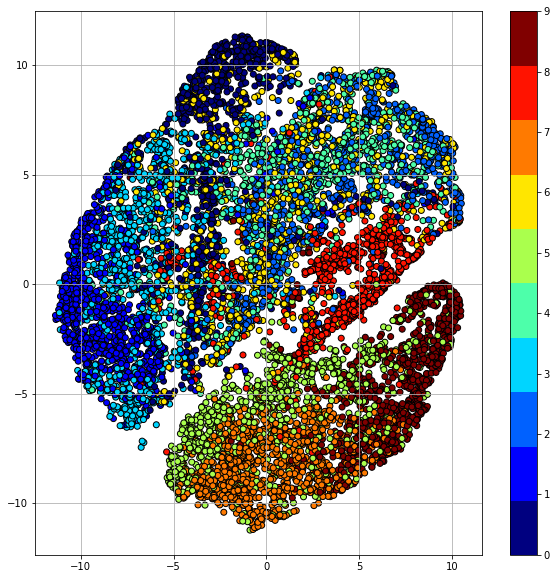

In [ ]:
with torch.no_grad():
    model = trainer.model
    model.eval()
    z=[];label=[];z1=[];z2=[];z3=[]
    for x,y in trainer.val_loader:
        x = x.to(trainer.device)
        x = x.view(x.size(0), -1)
        z_ = model.encoder(x.to(trainer.device))
        z_ = model.reparameterise(z_[0], z_[1])
        z += z_.cpu().tolist()
        label += y.cpu().tolist()

    z = np.asarray(z)
    label = np.asarray(label)
    from sklearn.manifold import TSNE
    tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300, learning_rate='auto')
    transformed_z = tsne.fit_transform(z)

from autoencoder_starter import scatter_plot
scatter_plot(latent_representations=transformed_z, labels=label)